## Contraints ##
-np.pi < eef[0] < 0
eef[2] > 0
- 1.5 * np.pi < eef[3] < 0.2
- np.pi < eef[4] < 0

In [ ]:
from utils_ur5 import *

In [2]:
RS = RealSense()
CGN = ContactGraspNet(K=RS.K_rs)
UR5 = UR5Robot(RS)
GSAM = GroundedSAM()

/home/ur-plusle/Desktop/contact_graspnet/pointnet2/tf_ops/sampling
--- Get model
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2024-07-29 18:39:59.484996: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-29 18:39:59.485751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-29 18:39:59.485833: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 4080 computeCapability: 8.9
coreClock: 2.595GHz coreCount: 76 deviceMemorySize: 15.70GiB deviceMemoryBandwidth: 667.63GiB/s
2024-07-29 18:39:59.485863: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1)

('loading ', '/home/ur-plusle/Desktop/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-54054')
INFO:tensorflow:Restoring parameters from /home/ur-plusle/Desktop/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-54054


2024-07-29 18:40:01.392768: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-07-29 18:40:01.392787: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2024-07-29 18:40:01.392797: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2024-07-29 18:40:01.392948: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-29 18:40:01.393029: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-29 18:40:01.393082: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-

Activation completed. Activation time :  1.0879456996917725
T_eef_to_rs: [[ 0.99878492  0.04703192 -0.01471985 -0.02140412]
 [-0.04732915  0.99866812 -0.02054116  0.05913408]
 [ 0.01373416  0.02121288  0.99968064  0.09495519]
 [ 0.          0.          0.          1.        ]]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Error: (inverse kinematics) failed to get ik solution


[ INFO] [1722246001.718896920]: Loading robot model 'ur5_robot'...
[ INFO] [1722246001.750997243]: IK Using joint shoulder_link -6.28319 6.28319
[ INFO] [1722246001.751005008]: IK Using joint upper_arm_link -6.28319 6.28319
[ INFO] [1722246001.751008580]: IK Using joint forearm_link -3.14159 3.14159
[ INFO] [1722246001.751011814]: IK Using joint wrist_1_link -6.28319 6.28319
[ INFO] [1722246001.751014728]: IK Using joint wrist_2_link -6.28319 6.28319
[ INFO] [1722246001.751017567]: IK Using joint wrist_3_link -6.28319 6.28319
[ INFO] [1722246001.751021918]: Looking in common namespaces for param name: manipulator/position_only_ik
[ INFO] [1722246001.751438413]: Looking in common namespaces for param name: manipulator/solve_type
[ INFO] [1722246001.751823128]: Using solve type Distance
[ INFO] [1722246002.872233265]: Ready to take commands for planning group manipulator.
Before NMS: 3 boxes
After NMS: 3 boxes


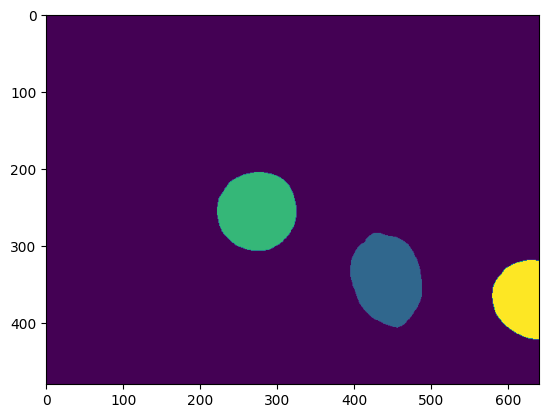

In [3]:
rospy.sleep(1.0)
rgb, depth = UR5.get_view(UR5.ROBOT_INIT_POS, UR5.ROBOT_INIT_QUAT, show_img=True)
#rgb, depth = RS.get_frames()
INIT_JOINTS = UR5.get_joint_states()
INIT_EEF_P = UR5.get_eef_pose()

classes = ["Orange", "Apple", "Lemon"]
detections = GSAM.get_masks(rgb, classes)
#print(detections.class_id)

segmap = np.zeros(depth.shape)
for i, m in enumerate(detections.mask):
    segmap[m] = i+1
plt.imshow(segmap)
plt.show()


In [4]:
segmap_id = 1
grasps, scores = CGN.get_grasps(rgb, depth, segmap, segmap_id, num_K=1, show_result=False)

Converting depth to point cloud(s)...
Generating Grasps...


2024-07-29 18:40:14.302984: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-07-29 18:40:14.571019: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8801
2024-07-29 18:40:14.612933: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-07-29 18:40:14.612949: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2024-07-29 18:40:14.612986: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-07-29 18:40:14.631217: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-07-29 18:40:14.631998: I tensorflow/stream_exec

Generated 51 grasps
# grasps: 8


In [5]:
grasps

(array([[ 0.9959283 ,  0.03244205, -0.08410802,  0.10131984],
        [-0.0046641 ,  0.9502941 ,  0.31131858,  0.0521605 ],
        [ 0.09002715, -0.30965868,  0.94657624,  0.35016364],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32),)

In [6]:
INIT_EEF_P

([3.2139032558885802e-06, -0.40003028424482623, 0.5999756820187643],
 [0.9999998049597082,
  -0.00031849335787819376,
  0.00046294021131097264,
  0.0002726332467511948])

In [8]:
pos, quat = UR5.get_goal_from_grasp(grasps[0], INIT_EEF_P)

goal P: [[ 0.99330305  0.08077954 -0.08260457  0.07744565]
 [ 0.05295468 -0.95374777 -0.29590703 -0.49956045]
 [-0.10268715  0.28955104 -0.95163839  0.15259637]
 [ 0.          0.          0.          1.        ]]


In [10]:
goal_pos[2] = np.clip(goal_pos[2], 0.22, 0.7)
goal_P = form_T(quat2mat(quat), goal_pos)
joints = UR5.solve_ik(goal_P)
print(joints)

Find solutions: [-1.62347734 -1.40870547  2.06296539 -2.5302937  -1.6377548   3.01003075]
[-1.62347734 -1.40870547  2.06296539 -2.5302937  -1.6377548   3.01003075]


In [12]:
n_obj = 2
for segmap_id in range(1, n_obj+1):
    grasps, scores = CGN.get_grasps(rgb, depth, segmap, segmap_id, num_K=1, show_result=False)
    #grasps, scores = CGN.get_4dof_grasps(rgb, depth, segmap, segmap_id, num_K=1, show_result=True)
    print(grasps)
    grasp = grasps[0]
    grasp_4dof = project_grasp_4dof(grasp)

    check_go()
    UR5.get_view(UR5.PRE_PLACE_POS, [1,0,0,0])
    check_go()
    pick_pos, pick_quat = UR5.get_goal_from_grasp(grasp, INIT_EEF_P)
    pick_4dof_pos, pick_4dof_quat = UR5.get_goal_from_grasp(grasp_4dof, INIT_EEF_P)
    #UR5.get_view(pick_pos + np.array([0, 0, 0.1]), pick_4dof_quat)
    #check_go()
    UR5.get_view(pick_pos + np.array([0, 0, 0.1]), pick_quat)
    check_go()
    UR5.get_view(pick_pos + np.array([0, 0, 0.05]), pick_quat)
    check_go()
    UR5.get_view(grasp=1.0)
    check_go()
    UR5.get_view(pick_pos + np.array([0, 0, 0.1]), pick_quat, grasp=1.0)
    check_go()
    #UR5.get_view(pick_pos + np.array([0, 0, 0.1]), pick_4dof_quat, grasp=1.0)
    #check_go()
    UR5.get_view(pick_pos + np.array([0, 0, 0.2]), UR5.ROBOT_INIT_QUAT, grasp=1.0)
    check_go()
    UR5.move_to_joints(INIT_JOINTS)
    check_go()
    UR5.get_view(UR5.ROBOT_INIT_POS, UR5.ROBOT_INIT_QUAT, grasp=0.0)
    break


Converting depth to point cloud(s)...
Generating Grasps...
Generated 74 grasps
# grasps: 9
(array([[-0.98176295,  0.12148821,  0.146226  ,  0.06888197],
       [-0.06072873, -0.9292841 ,  0.36433917,  0.02610746],
       [ 0.18014841,  0.34881458,  0.91971457,  0.35798395],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32),)


go? y


y


Error: (inverse kinematics) failed to get ik solution


go? y


y
goal P: [[-0.98591292  0.07340575  0.15029046  0.04372879]
 [ 0.01841996  0.94073456 -0.33864326 -0.47489897]
 [-0.16624178 -0.33110442 -0.92883455  0.14573205]
 [ 0.          0.          0.          1.        ]]
goal P: [[-0.99978731  0.01533969 -0.01378134  0.04372879]
 [ 0.01506238  0.99968642  0.02000514 -0.47489897]
 [ 0.01408389  0.0197933  -0.99970496  0.14573205]
 [ 0.          0.          0.          1.        ]]
Find solutions: [-1.7468034  -1.52177548  2.12086177 -2.48919344 -1.36201799 -0.09464404]
[ 0.04372879 -0.47489897  0.24573205]
[ 0.02338272  0.98176907 -0.17054613  0.08060252]


go? y


y
Find solutions: [-1.7468034  -1.47901428  2.15572309 -2.56681585 -1.36201799 -0.09464404]
[ 0.04372879 -0.47489897  0.22      ]
[ 0.02338272  0.98176907 -0.17054613  0.08060252]


go? 



exit.


NameError: name 'exit' is not defined

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from utils_sim2real import inverse_projection
from utils_mcts import Renderer
from environment import RealEnvironment

2024-08-23 15:20:06.304965: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-08-23 15:20:06.753926: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-08-23 15:20:06.797884: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-23 15:20:06.797976: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 4080 computeCapability: 8.9
coreClock: 2.595GHz coreCount: 76 deviceMemorySize: 15.70GiB deviceMemoryBandwidth: 667.63GiB/s
2024-08-23 15:20:06.797991: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-08-23 15:20:06.799323: I tensorflow/stream_executor/

Failed to import pyassimp, see https://github.com/moveit/moveit/issues/86 for more info


In [2]:
env = RealEnvironment(None)
renderer = Renderer(tableSize=(12, 15), imageSize=(360, 480), cropSize=(128, 128))

/home/ur-plusle/Desktop/contact_graspnet/pointnet2/tf_ops/sampling
--- Get model
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2024-08-23 15:20:11.232336: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-23 15:20:11.233155: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-23 15:20:11.233243: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 4080 computeCapability: 8.9
coreClock: 2.595GHz coreCount: 76 deviceMemorySize: 15.70GiB deviceMemoryBandwidth: 667.63GiB/s
2024-08-23 15:20:11.233286: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1)

('loading ', '/home/ur-plusle/Desktop/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-54054')
INFO:tensorflow:Restoring parameters from /home/ur-plusle/Desktop/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-54054


2024-08-23 15:20:13.178323: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-08-23 15:20:13.178340: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2024-08-23 15:20:13.178343: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2024-08-23 15:20:13.178492: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-23 15:20:13.178574: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-23 15:20:13.178628: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-

Activation completed. Activation time :  1.088433027267456
T_eef_to_rs: [[-0.99983227 -0.01573237 -0.00937635  0.03576282]
 [ 0.01582321 -0.99982781 -0.00969452  0.05088814]
 [-0.00922221 -0.00984126  0.99990905  0.09224959]
 [ 0.          0.          0.          1.        ]]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Add bias: [0, 0, 0]


Error: (inverse kinematics) failed to get ik solution


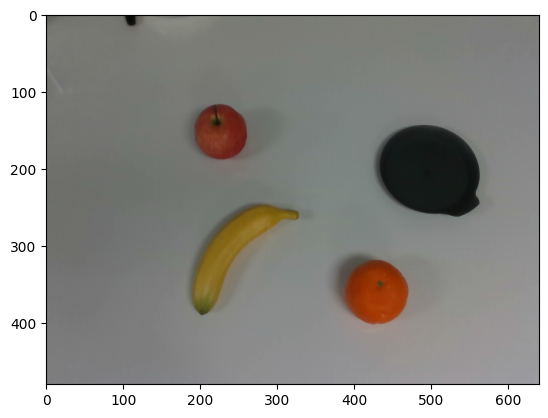

In [3]:
rgb, depth = env.UR5.get_view(env.UR5.ROBOT_INIT_POS, env.UR5.ROBOT_INIT_QUAT, show_img=True)
plt.imshow(rgb)

In [6]:
#classes = ["Apple. Lemon. Orange. Fruit. Basket. Scissors."]
classes = "Apple. Lemon. Orange. Fruit. Basket. Scissors. Box".replace(' ', '').split('.')

classes = "Glass.Cup.Bowl.Basket.Plate.Teapot.Shampoo.Clock.Soup case.Toothpaste.Tube.Box".split(".")
classes = "Glass.Cup.Bowl.Basket.Plate.Teapot.Shampoo.Clock.Soup case.Toothpaste.Tube.Box.Marker.Stapler.Vaseline.Pen".split(".")

obs = env.reset(classes)
initRgb = obs['rgb']
initSeg = obs['segmentation']
renderer.setup(initRgb, initSeg)

Error: (inverse kinematics) failed to get ik solution


Save images...
Before NMS: 2 boxes
After NMS: 2 boxes


SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0

In [8]:
np.array(classes)[obs['class_id']]

array(['Soup case', 'Tube'], dtype='<U10')

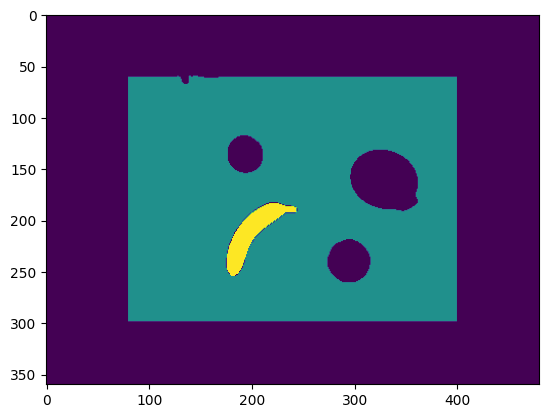

In [9]:
plt.imshow(env.current_obs['segmentation'])

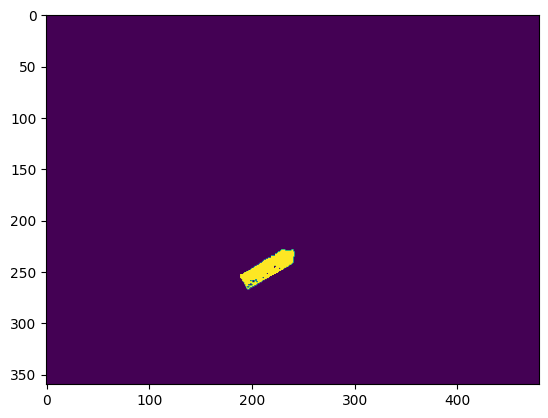

In [19]:
plt.imshow(env.current_obs['segmentation']==10)

In [15]:
env.check_picknplace(6, stop=False)

Converting depth to point cloud(s)...
Generating Grasps...
Generated 1 grasps
skipped gripper openings 0.0725269690155983
# grasps: 0
Rule-based grasp:
width: 46.753473398735075
height: 42.02628951277834
Type: boundary
point: [335 179]
grasp: [[-1.          0.          0.          0.01477549]
 [ 0.         -1.          0.         -0.07482639]
 [ 0.          0.          1.          0.7       ]
 [ 0.          0.          0.          1.        ]]
goal P: [[ 0.9998442   0.01531249 -0.0087804   0.01790205]
 [ 0.01090794 -0.92709056 -0.37467819 -0.53176831]
 [-0.01387748  0.37452407 -0.92711315  0.21756319]
 [ 0.          0.          0.          1.        ]]
goal P: [[ 0.9998442   0.01531249 -0.0087804   0.01746303]
 [ 0.01090794 -0.92709056 -0.37467819 -0.55050222]
 [-0.01387748  0.37452407 -0.92711315  0.17120753]
 [ 0.          0.          0.          1.        ]]


Error: (inverse kinematics) failed to get ik solution
Error: (inverse kinematics) failed to get ik solution
Error: (inverse kinematics) failed to get ik solution
Error: (inverse kinematics) failed to get ik solution
Error: (inverse kinematics) failed to get ik solution
Error: (inverse kinematics) failed to get ik solution
Error: (inverse kinematics) failed to get ik solution


In [9]:
env.check_picknplace(2, stop=False)

Converting depth to point cloud(s)...
Generating Grasps...


2024-08-23 14:26:02.089619: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-08-23 14:26:02.329920: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8801
2024-08-23 14:26:02.375494: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-08-23 14:26:02.375509: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2024-08-23 14:26:02.375549: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-08-23 14:26:02.394481: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-08-23 14:26:02.395273: I tensorflow/stream_exec

Generated 0 grasps
skipping obj 2 since  np.any(pc_segments[k]) True and np.any(contact_pts[j]) is False


KeyError: 2

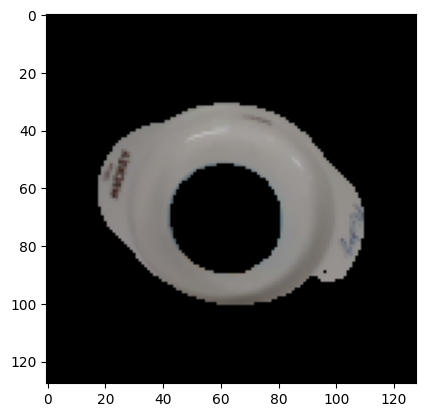

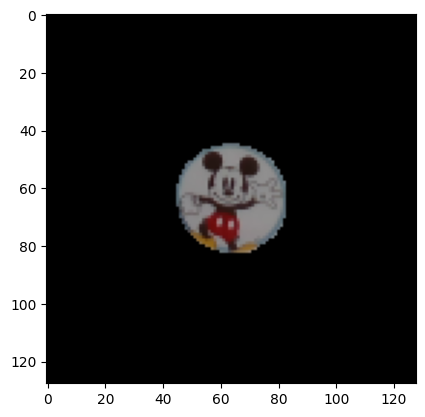

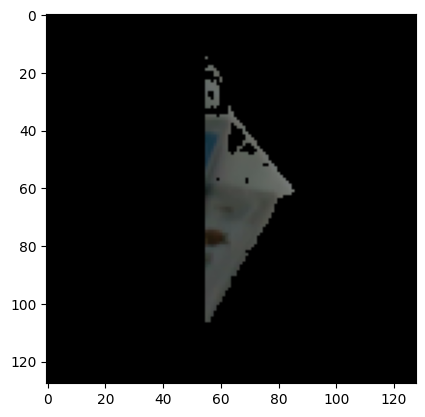

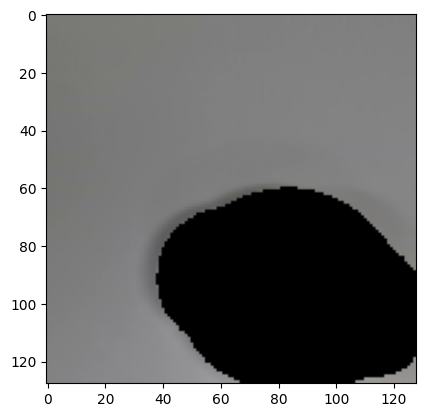

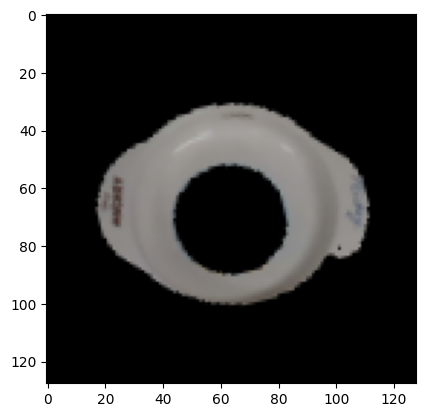

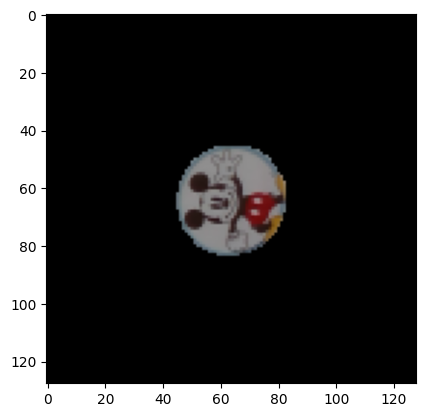

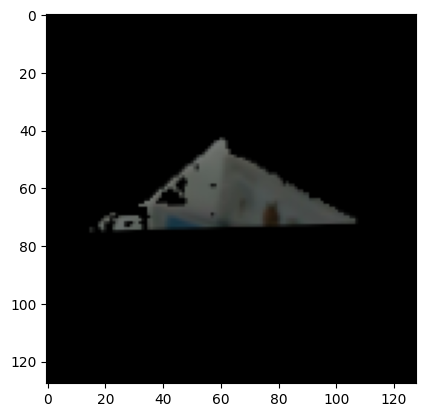

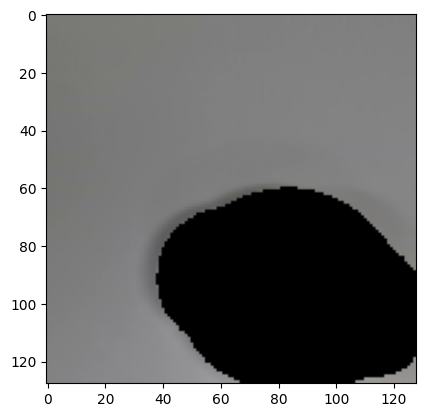

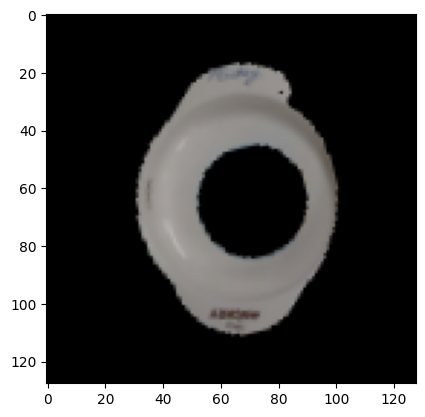

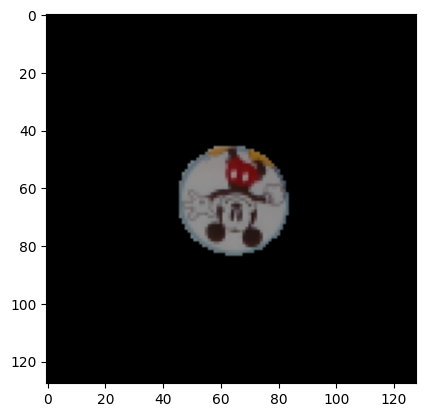

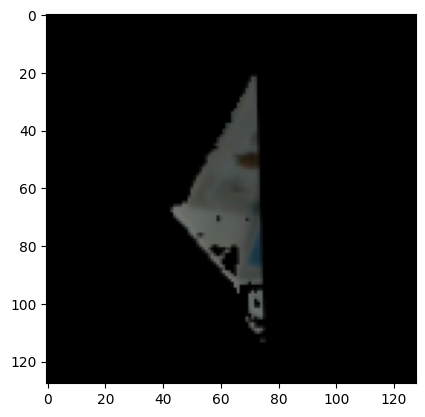

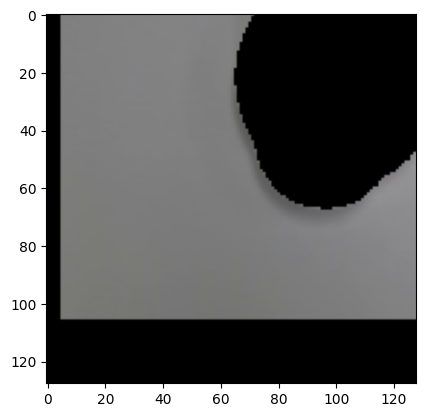

In [35]:
for x in renderer.objectPatches:
    for y in x:
        plt.imshow(y/255.)
        plt.show()

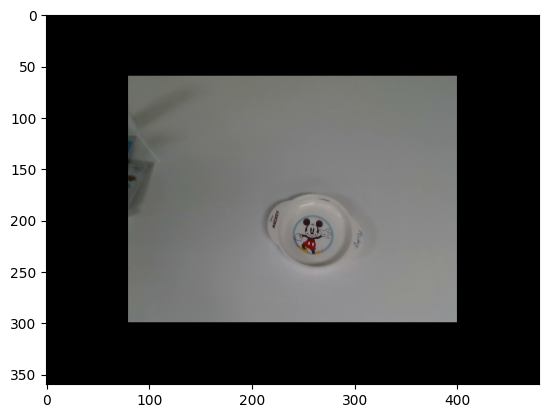

In [36]:
plt.imshow(initRgb)

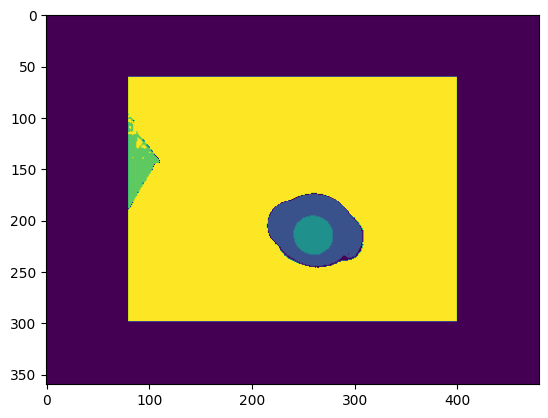

In [37]:
plt.imshow(env.current_obs['segmentation'])

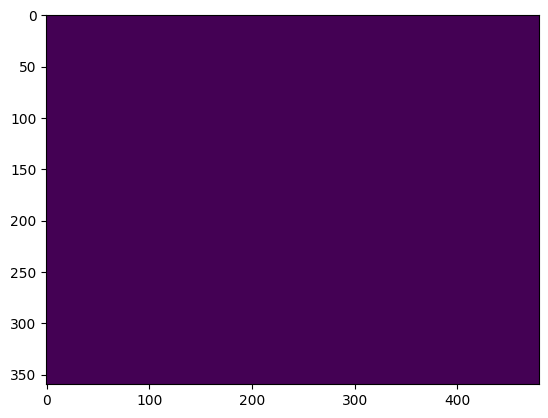

In [100]:
plt.imshow(env.current_obs['segmentation']==7)

In [27]:
from utils_sim2real import inverse_projection

In [48]:
from transform_utils import quat2mat, euler2quat

In [50]:
quat2mat(euler2quat([0, 0, phi]))

array([[ 0.83640103,  0.548118  ,  0.        ],
       [-0.548118  ,  0.83640103, -0.        ],
       [-0.        ,  0.        ,  1.        ]])

In [94]:
quat2mat(euler2quat([0, 0, np.pi]))

array([[-9.99999881e-01, -1.22464672e-16,  0.00000000e+00],
       [ 1.22464672e-16, -9.99999881e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [ ]:
inverse_projection(depth, pixel, env.RS.K_rs, env.RS.D_rs)

In [43]:
inverse_projection(env.current_obs['depth_raw'], np.array([my, mx]).astype(int), env.RS.K_rs, env.RS.D_rs)

array([0.02452531, 0.03947758, 0.654     ])

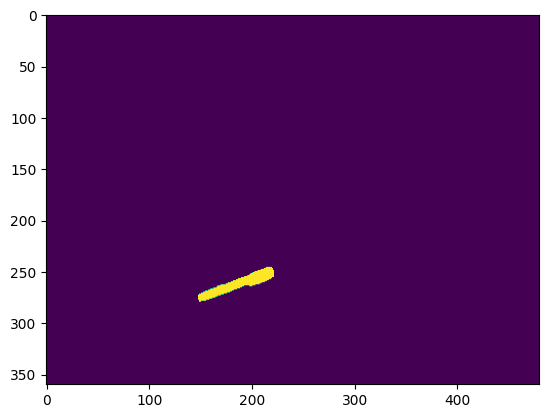

In [259]:
plt.imshow(env.current_obs['segmentation']==3)

In [266]:
px.mean()

50.229573780581624

96

In [264]:
py

array([258, 258, 258, ..., 348, 348, 348])

In [12]:
from ellipse import LsqEllipse

In [260]:
X = np.array(list(zip(*np.where(env.current_obs['segmentation']==3))))
reg = LsqEllipse().fit(X)

In [261]:
center, width, height, phi = reg.as_parameters()

In [262]:
width

30.78927501557659

In [263]:
height

4.361103683836783

In [249]:
phi

1.0146739839679113

In [82]:
from utils_contactgraspnet import form_T

In [199]:
py, px = np.where(env.current_obs['segmentation_raw']==5)
my, mx = np.mean(py), np.mean(px)
print(my, mx)

t = inverse_projection(env.current_obs['depth_raw'], np.array([mx, my]).astype(int), env.RS.K_rs, env.RS.D_rs)
print(t)

rot = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, 1]])
rot = np.dot(quat2mat(euler2quat([0, 0, -phi])), rot)
#rot = np.dot(quat2mat(euler2quat([0, 0, phi+np.pi/2])), rot)
grasp_rule = form_T(rot, t)

302.1523311278658 50.229573780581624
[-0.22705564  0.04825257  0.509     ]


In [200]:
grasp_rule

array([[-0.52789688, -0.84930849,  0.        , -0.22705564],
       [ 0.84930849, -0.52789688,  0.        ,  0.04825257],
       [ 0.        ,  0.        ,  1.        ,  0.509     ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

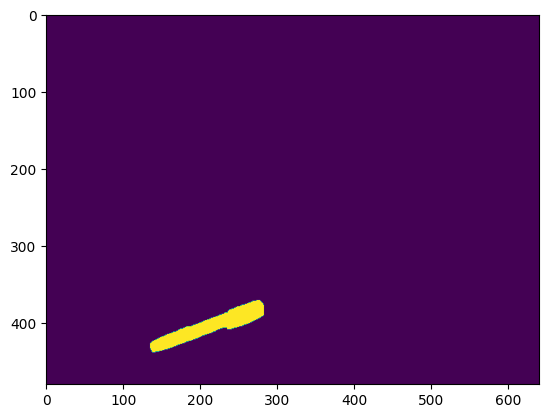

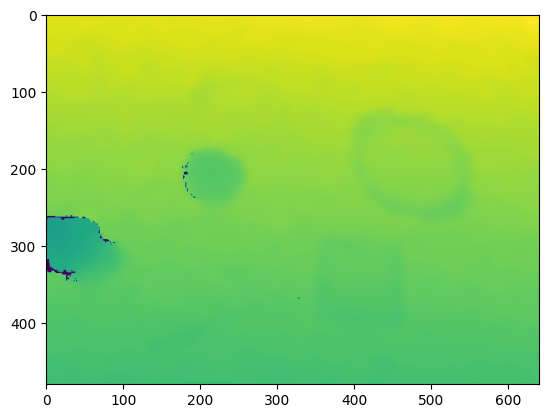

In [201]:
target = 5
plt.imshow(env.current_obs['segmentation_raw']==3)
plt.show()
plt.imshow(env.current_obs['depth_raw'])

In [89]:
grasp1 = np.array([[-0.16897786,  0.9830221,  -0.07151271, -0.06034984],
     [-0.9392518,  -0.13861142,  0.31399524,  0.00628405],
     [ 0.2987518,   0.12022669,  0.94672745,  0.5163116 ],
     [ 0.,          0.,          0.,          1.        ]])
pos, quat = env.UR5.get_goal_from_grasp(grasp1, env.init_eef_P)
env.UR5.get_view(pos, quat)

goal P: [[ 0.18120204 -0.98171418  0.05833629  0.09167501]
 [-0.98091652 -0.18466935 -0.06082778 -0.46820419]
 [ 0.07048841 -0.04620092 -0.99644202  0.15190216]
 [ 0.          0.          0.          1.        ]]
Find solutions: [-1.61912596 -1.48458576  2.06795812 -2.21224856 -1.50955129  4.48153562]
[ 0.09167501 -0.46820419  0.22      ]
[ 0.76849097 -0.63846902  0.04190834  0.00475831]


(None, None)

In [134]:
grasp_rule

array([[-0.08093613,  0.99671924,  0.        , -0.04213268],
       [-0.99671924, -0.08093613,  0.        ,  0.10331847],
       [ 0.        ,  0.        ,  1.        ,  0.625     ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [142]:
from transform_utils import mat2euler

In [149]:
euler2quat([np.pi, 0, mat2euler(quat2mat(quat))[2]])

[0.7429908426495786,
 -0.6693015820531647,
 -4.098290200628339e-17,
 4.549506786233006e-17]

In [148]:
euler2quat([np.pi, 0, phi+np.pi/2])

[0.7351653216403482,
 0.6778878593524473,
 4.150865985684129e-17,
 4.501589289954934e-17]

In [146]:
euler2quat(mat2euler(quat2mat(quat)))

[0.7264665351996841,
 -0.6604346660227383,
 0.12446031261715487,
 0.1434644755109793]

In [147]:
mat2euler(quat2mat(quat))

array([ 3.0941548, -0.3793646, -1.4665368], dtype=float32)

In [138]:
quat

array([ 0.72646654, -0.66043467,  0.12446034,  0.14346444])

In [202]:
grasp_rule
pos, quat = env.UR5.get_goal_from_grasp(grasp_rule, env.init_eef_P)
env.UR5.get_view(pos, quat)

goal P: [[ 0.51416343  0.85762756 -0.01053399  0.25659997]
 [ 0.79380732 -0.48048148 -0.37283785 -0.4247679 ]
 [-0.32481741  0.18333763 -0.92783701  0.14034708]
 [ 0.          0.          0.          1.        ]]
Find solutions: [-1.22608399 -1.41995168  2.09835267 -2.60740685 -1.70712411  2.4328928 ]
[ 0.25659997 -0.4247679   0.22      ]
[ 0.85476334  0.48300932 -0.09808309  0.16266939]


(None, None)

In [204]:
grasp_rule
pos, quat = env.UR5.get_goal_from_grasp(grasp_rule, env.init_eef_P)
newquat = euler2quat([np.pi, 0, mat2euler(quat2mat(quat))[2]])
env.UR5.get_view(pos, newquat)

goal P: [[ 0.51416343  0.85762756 -0.01053399  0.25659997]
 [ 0.79380732 -0.48048148 -0.37283785 -0.4247679 ]
 [-0.32481741  0.18333763 -0.92783701  0.14034708]
 [ 0.          0.          0.          1.        ]]


Error: (inverse kinematics) failed to get ik solution


(None, None)

In [205]:
env.UR5.move_to_joints(env.INIT_JOINTS)

In [80]:
quat2mat(euler2quat([0, 0, -np.pi/2]))

array([[ 0.,  1.,  0.],
       [-1.,  0., -0.],
       [-0.,  0.,  1.]])

In [78]:
quat2mat([1,0,0,0])

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        , -0.99999988,  0.        ],
       [ 0.        ,  0.        , -0.99999988]])

In [79]:
grasp1 = np.array([[1,  0,  0, -0.06034984],
     [0,  -1,  0,  0.00628405],
     [ 0,   0,  -1,  0.5163116 ],
     [ 0.,          0.,          0.,          1.        ]])
env.UR5.get_goal_from_grasp(grasp1, env.init_eef_P)

goal P: [[-0.99983762  0.0158002   0.00866524  0.09167501]
 [-0.01143093 -0.92782516  0.37284007 -0.46820419]
 [ 0.01393077  0.37268046  0.92785511  0.15190216]
 [ 0.          0.          0.          1.        ]]


(array([ 0.09167501, -0.46820419,  0.15190216]),
 array([-0.00575388, -0.18984024, -0.98177365,  0.00693417]))

In [35]:
env.current_obs.keys()

dict_keys(['rgb_raw', 'depth_raw', 'segmentation_raw', 'rgb', 'depth', 'segmentation', 'class_id'])

In [ ]:
env.check_picknplace(3, stop=False)

Converting depth to point cloud(s)...
Generating Grasps...


2024-08-21 18:39:27.094466: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-08-21 18:39:27.368572: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8801
2024-08-21 18:39:27.410197: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-08-21 18:39:27.410207: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2024-08-21 18:39:27.410235: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-08-21 18:39:27.428089: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-08-21 18:39:27.428856: I tensorflow/stream_exec

Generated 8 grasps
# grasps: 1
GCN grasp:
grasp: [[-0.5257469   0.85050565 -0.01517793 -0.13274644]
 [-0.5543827  -0.32905394  0.7644497   0.08294402]
 [ 0.64517444  0.41032144  0.6445047   0.5243278 ]
 [ 0.          0.          0.          1.        ]]
goal P: [[ 0.52773155 -0.84940551 -0.00311573  0.16219342]
 [-0.75000126 -0.46768788  0.46772466 -0.44708088]
 [-0.39874512 -0.24449627 -0.88386888  0.20343614]
 [ 0.          0.          0.          1.        ]]
goal P: [[ 0.52773155 -0.84940551 -0.00311573  0.16203763]
 [-0.75000126 -0.46768788  0.46772466 -0.42369465]
 [-0.39874512 -0.24449627 -0.88386888  0.15924269]
 [ 0.          0.          0.          1.        ]]
Find solutions: [-1.46276796 -1.41916394  1.87435615 -1.54138649 -1.52344704  4.25200802]
[ 0.16219342 -0.44708088  0.22      ]
[-0.84842326  0.47128797  0.11841402  0.20986602]
Find solutions: [-1.45780957 -1.46987581  1.93283701 -1.5493685  -1.5211376   4.25640113]
[ 0.16203763 -0.42369465  0.22      ]
[-0.84842326  

Error: (inverse kinematics) failed to get ik solution


In [ ]:
# n_obj = len(renderer.objectPatches)
for o in range(n_obj):
    env.check_picknplace(o+1, stop=False)

In [17]:
action = renderer.convert_action([2, 8, 11, 0])
print(action)

(2, [576, 388], 0.0)


In [7]:
action = renderer.convert_action([2, 8, 11, 1])
print(action)

(2, [576, 388], 0.8156919536922359)


In [10]:
action = renderer.convert_action([2, 8, 11, 2])
print(action)

(2, [576, 388], 2.3864882804871326)


In [8]:
obj, pose, angle = action
env.step(obj, pose, angle)

go? y


y
Converting depth to point cloud(s)...
Generating Grasps...


2024-07-31 17:08:32.198497: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-07-31 17:08:32.435415: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8801
2024-07-31 17:08:32.476586: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-07-31 17:08:32.476598: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2024-07-31 17:08:32.476628: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-07-31 17:08:32.492649: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-07-31 17:08:32.493498: I tensorflow/stream_exec

Generated 14 grasps
# grasps: 10
goal P: [[ 0.97201052 -0.22891196  0.0528662   0.14851825]
 [-0.23364229 -0.9654553   0.11535767 -0.61495747]
 [ 0.02463321 -0.12448068 -0.99191627  0.27167684]
 [ 0.          0.          0.          1.        ]]
goal P: [[ 0.97201052 -0.22891196  0.0528662   0.15116156]
 [-0.23364229 -0.9654553   0.11535767 -0.60918959]
 [ 0.02463321 -0.12448068 -0.99191627  0.22208103]
 [ 0.          0.          0.          1.        ]]


go? y


y
Find solutions: [-1.5150491  -1.17652524  1.48101366 -1.7626164  -1.51155007  3.4283529 ]
[ 0.14851825 -0.61495747  0.27167684]
[-0.99113344  0.11667306 -0.01954818  0.06049597]


go? y


y
Find solutions: [-1.51032102 -1.14598644  1.57188213 -1.88430369 -1.51101911  3.43305952]
[ 0.15116156 -0.60918959  0.22208103]
[-0.99113344  0.11667306 -0.01954818  0.06049597]


go? y


y


go? y


y
Find solutions: [-1.5150491  -1.17652524  1.48101366 -1.7626164  -1.51155007  3.4283529 ]
[ 0.14851825 -0.61495747  0.27167684]
[-0.99113344  0.11667306 -0.01954818  0.06049597]


go? y


y


Error: (inverse kinematics) failed to get ik solution


goal P: [[ 0.86248363  0.4136268  -0.29160753 -0.20964525]
 [ 0.44232662 -0.89608105  0.03722933 -0.43878445]
 [-0.24590493 -0.16109546 -0.95581329  0.27958383]
 [ 0.          0.          0.          1.        ]]
goal P: [[ 0.86248363  0.4136268  -0.29160753 -0.22422562]
 [ 0.44232662 -0.89608105  0.03722933 -0.43692299]
 [-0.24590493 -0.16109546 -0.95581329  0.23179316]
 [ 0.          0.          0.          1.        ]]


go? y


y
Find solutions: [-2.19831944 -1.52560246  1.97187757 -2.16361356 -1.83165538  2.04183459]
[-0.20964525 -0.43878445  0.27958383]
[-0.96363606 -0.22206346  0.13944902  0.0514522 ]


go? y


y
Find solutions: [-2.22562003 -1.45405209  2.03507829 -2.30551195 -1.82757223  2.01391077]
[-0.22422562 -0.43692299  0.23179316]
[-0.96363606 -0.22206346  0.13944902  0.0514522 ]


go? y


y


go? y


y
Find solutions: [-2.19831944 -1.52560246  1.97187757 -2.16361356 -1.83165538  2.04183459]
[-0.20964525 -0.43878445  0.27958383]
[-0.96363606 -0.22206346  0.13944902  0.0514522 ]


go? y


y


Error: (inverse kinematics) failed to get ik solution


Before NMS: 6 boxes
After NMS: 2 boxes


{'rgb_raw': array([[[103, 107, 100],
         [105, 109, 102],
         [105, 109, 102],
         ...,
         [118, 117, 117],
         [112, 118, 116],
         [112, 118, 116]],
 
        [[103, 107, 100],
         [105, 109, 102],
         [105, 109, 102],
         ...,
         [117, 118, 114],
         [115, 119, 114],
         [114, 118, 113]],
 
        [[103, 107, 100],
         [105, 109, 102],
         [105, 109, 102],
         ...,
         [117, 118, 112],
         [115, 119, 112],
         [115, 119, 112]],
 
        ...,
 
        [[121, 121, 123],
         [121, 121, 123],
         [119, 119, 121],
         ...,
         [150, 146, 151],
         [150, 145, 153],
         [150, 145, 153]],
 
        [[121, 121, 123],
         [121, 121, 123],
         [121, 121, 123],
         ...,
         [148, 146, 153],
         [148, 146, 153],
         [148, 146, 153]],
 
        [[121, 121, 123],
         [121, 121, 123],
         [121, 121, 123],
         ...,
         [148, 14

In [11]:
classes

['Glass',
 'Cup',
 'Bowl',
 'Basket',
 'Plate',
 'Teapot',
 'Shampoo',
 'Clock',
 'Soup case',
 'Toothpaste',
 'Tube',
 '']

In [12]:
classes = ['Apple', 'Ball', 'Lemon', 'Scissors']

In [63]:
classes = ['Apple. Ball. Lemon. Scissors.']

In [14]:
detections = env.GSAM.get_masks(rgb, classes)

Before NMS: 10 boxes
After NMS: 7 boxes


In [15]:
detections.class_id

array([1, 1, 9, 6, 6, 8, 8])

In [20]:
classes

['Glass',
 'Cup',
 'Bowl',
 'Basket',
 'Plate',
 'Teapot',
 'Shampoo',
 'Clock',
 'Soup case',
 'Toothpaste',
 'Tube',
 '']

In [17]:
np.array(classes)[detections.class_id]

array(['Cup', 'Cup', 'Toothpaste', 'Shampoo', 'Shampoo', 'Soup case',
       'Soup case'], dtype='<U10')

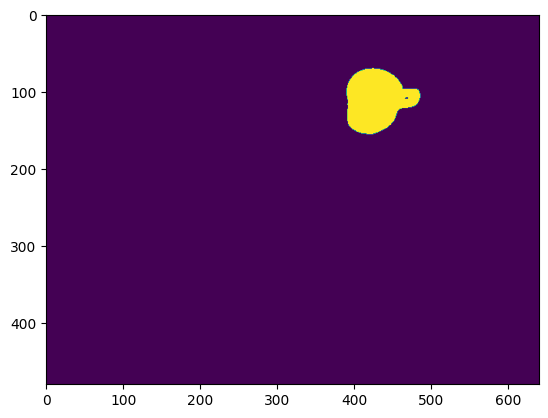

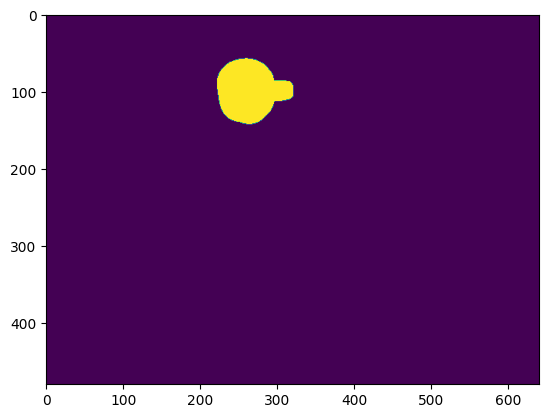

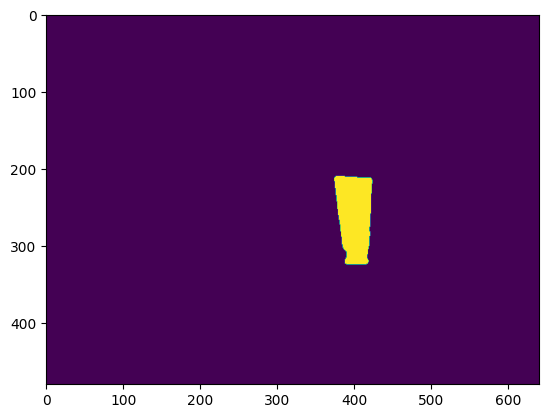

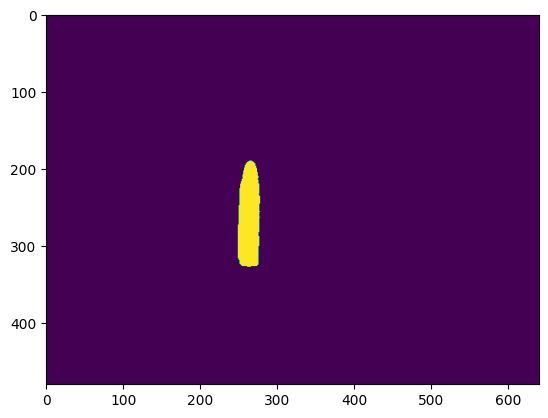

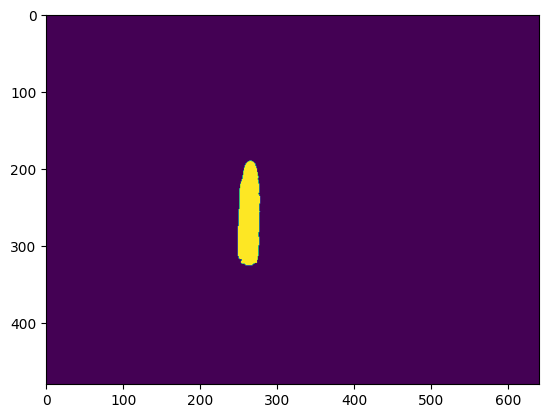

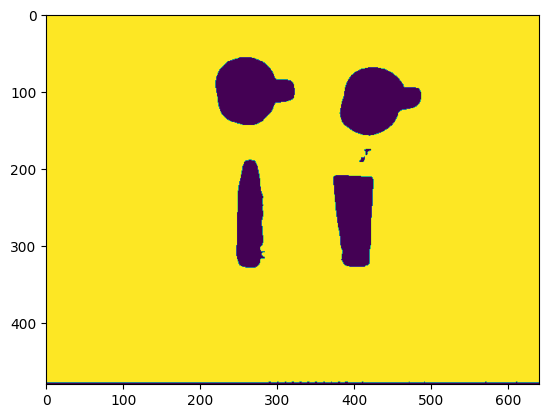

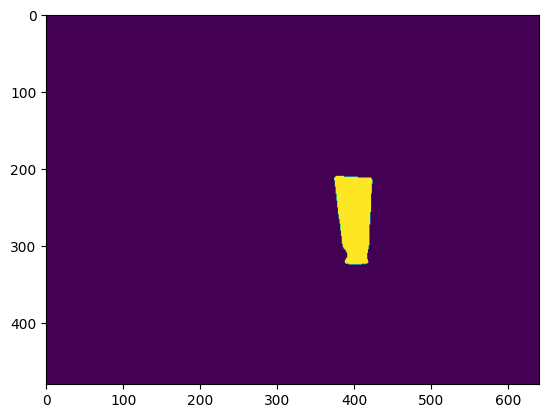

In [19]:
for m in detections.mask:
    plt.imshow(m)
    plt.show()

In [12]:
from transform_utils import euler2quat

In [9]:
renderer.ratio

array([30., 32.])

0 0 0.5609279318563563
0 1 0.45242023731403347
0 2 0.4740542561808384
0 3 0.43156006192210794
0 4 0.39592123243336186
0 5 0.36825872376252566
0 6 0.34608852712584776
0 7 0.3401445043301086
0 8 0.29932326001641557
0 9 0.3614181690884202
0 10 0.3855441627171548
0 11 0.3723017186721898
0 12 None
0 13 None
0 14 None
1 0 0.5540942899234432
1 1 0.49499613282236743
1 2 0.4542648256512652
1 3 0.40410840379892793
1 4 0.36033454605297677
1 5 0.322391746665277
1 6 0.3012951870132001
1 7 0.29212240252467986
1 8 0.29888632523609415
1 9 0.31851623638450327
1 10 0.35170315574303496
1 11 0.391182092464924
1 12 None
1 13 None
1 14 None
2 0 0.3970265641722498
2 1 0.3496767593319371
2 2 0.3110068429076261
2 3 0.26882787513132506
2 4 0.23294861169539352
2 5 0.2014860264533779
2 6 0.17719635247867732
2 7 0.16946033780235886
2 8 0.17588327616188784
2 9 0.1993488904597696
2 10 0.2288013050712263
2 11 0.2635043474686208
2 12 None
2 13 None
2 14 None
3 0 0.3928709556208575
3 1 0.3427709720401585
3 2 0.29754744

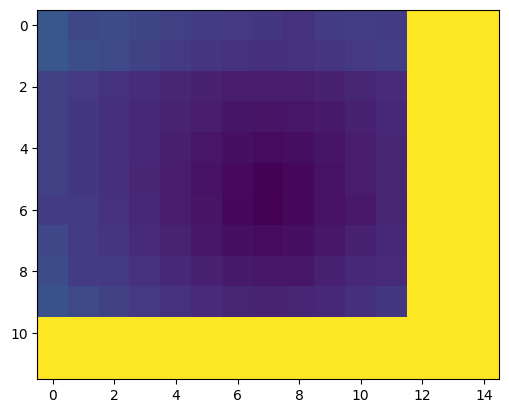

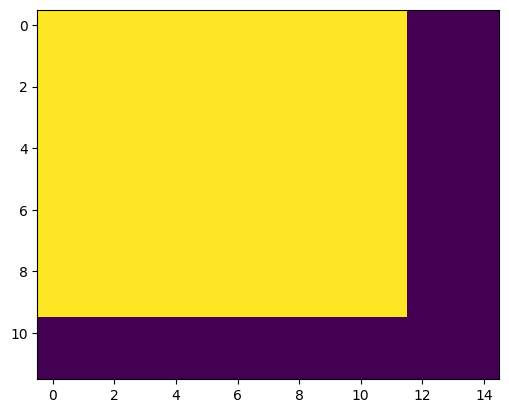

In [19]:
distmap = np.zeros([12, 15])
feasiblemap = np.zeros([12, 15])
depth = obs['depth_raw']
for y in range(12):
    for x in range(15):
        _, target_position, _ = renderer.convert_action([1, y, x, 0])
        try:
            target_pose = inverse_projection(depth, np.array(target_position), env.RS.K_rs, env.RS.D_rs)
            d = np.sqrt(target_pose[0]**2 + target_pose[1]**2)
            print(y, x, d)
        except:
            print(y, x, None)
            d = 2
        distmap[y, x] = d
        feasiblemap[y, x] = (d<0.8)
plt.imshow(distmap)
plt.show()
plt.imshow(feasiblemap)
plt.show()

In [5]:
renderer.convert_action([1, 0, 0, 0])

(1, [-128, -92], 0.0)

In [13]:
depth = obs['depth_raw']
target_position = [320, 268]
target_pose = inverse_projection(depth, np.array(target_position), env.RS.K_rs, env.RS.D_rs)

In [14]:
target_pose

array([-0.00179624,  0.02014777,  0.516     ])